In [1]:
import numpy as np
import matplotlib.pyplot as plt
import raytracing as rt

plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=True
# %matplotlib ipympl

40.56740422696879


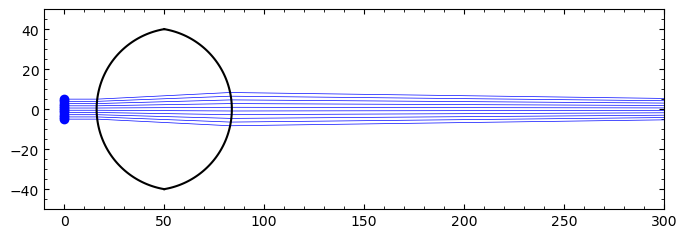

In [6]:
scene = rt.Scene(xlim=(-10,300), ylim=(-50,50))

# flat_refraction = rt.FlatRefraction(aperture=80,
#                                     n_in=1.4, n_out=1.0,
#                                     scene=scene, origin=[40,0], rotation=90)
# circular_refraction = rt.CircularRefraction(radius=100, aperture=80,
#                                             n_in=1.0, n_out=1.4,
#                                             scene=scene, origin=[50,0], rotation=-90)
# circular_refraction = rt.CircularRefraction(radius=150, aperture=80,
#                                             n_in=1.4, n_out=1.0,
#                                             scene=scene, origin=[50,0], rotation=90)
lens = rt.SymmetricalLens(focal=200, aperture=80, n=1.4, aspect=0.9,
                          scene=scene, origin=[50,0], rotation=90)

# ray = rt.Ray(scene=scene, origin=[0,0], rotation=0)
beam = rt.CollimatedBeam(aperture=10, N_sources=10, scene=scene, origin=[0,0], rotation=0)
# white = rt.CollimatedWhiteBeam(aperture=50, N_sources=10, wavelengths=np.linspace(450,620,10), scene=scene, origin=[0,0], rotation=0)

scene.plot()

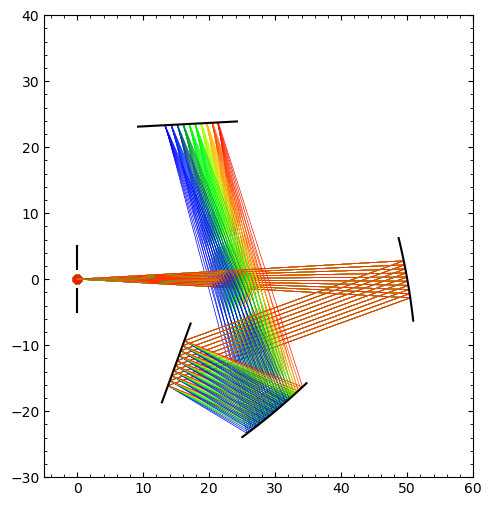

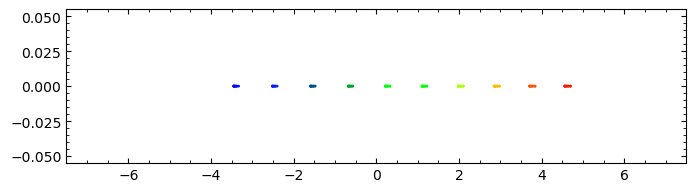

In [2]:
# Czerny-Turner Spectrograph
scene = rt.Scene(xlim=(-5,60), ylim=(-30,40))

slit_width = 3
slit_size = 10
primary_f    = 50
primary_aper = 12.7
second_f     = primary_f
second_aper  = primary_aper

spectrograph = rt.OpticalGroup(scene=scene, origin=[0,0], rotation=0, label="Spectrograph")
slit = rt.Slit(full_size=slit_size, slit_width=slit_width, group=spectrograph, origin=[0,0], rotation=90, label="Slit")
primary = rt.ParabolicMirror(focal=primary_f, aperture=primary_aper, group=spectrograph, origin=[primary_f,0], rotation=100, label="Primary")
secondary = rt.ParabolicMirror(focal=second_f, aperture=second_aper, group=spectrograph, origin=[30,-20], rotation=40, label="Secondary")
grating = rt.Grating(aperture=primary_aper, period=1000, order=1, group=spectrograph, origin=[15,-12.7], rotation=70, label="Grating")
camera = rt.Camera(aperture=15, group=spectrograph, origin=[16.7,23.5], rotation=3, label="Camera")

beams = rt.OpticalGroup(scene=scene, origin=[0,0], rotation=0, label="Beams")
F = 8.9
ang = 2*np.rad2deg(np.arctan(0.5/F))
white = rt.DivergingWhiteBeam(N_sources=10, angle=ang, wavelengths=np.linspace(450,620,10), group=beams, origin=[0,0], rotation=0, label="White")

full = spectrograph + beams

scene.plot(show_hitbox=False)
camera.plot()

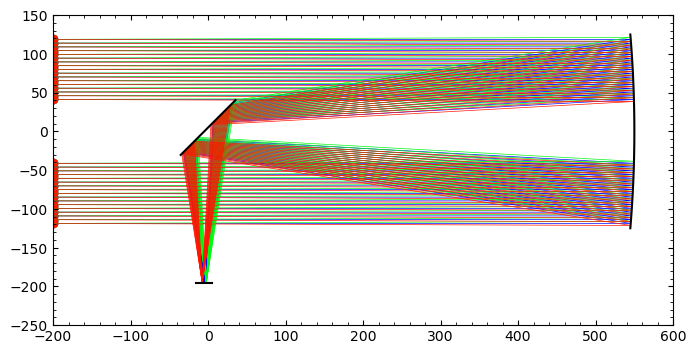

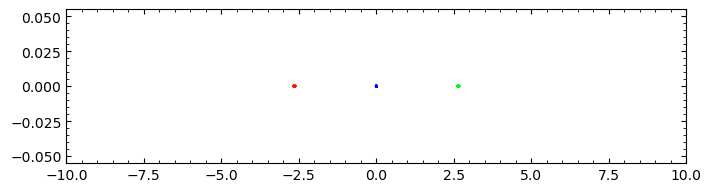

In [3]:
# Newtonian telescope
scene = rt.Scene(xlim=(-200,600), ylim=(-250,150), lifetime=1670)
# scene = rt.Scene(xlim=(-8,-2), ylim=(-197,-193), lifetime=2000)
# scene = rt.Scene(xlim=(-50,20), ylim=(-250,-170), lifetime=1670)

newtonian = rt.OpticalGroup(scene=scene, origin=[0,0], rotation=0, label="Newtonian")
primary = rt.ParabolicMirror(focal=750, aperture=250, group=newtonian, origin=[550,0], rotation=90, label="Primary")
secondary = rt.FlatMirror(aperture=100, group=newtonian, origin=[0,5], rotation=45, label="Secondary")
camera = rt.Camera(aperture=20, group=newtonian, origin=[-5,-195], rotation=0, label="Camera")

beam = rt.CollimatedBeam(aperture=0.95*primary.aperture, scene=scene, origin=[-200,0], rotation=0, N_sources=50, hole=1.1*secondary.aperture*np.cos(secondary.rotation))
beam = rt.CollimatedBeam(wavelength=520, aperture=0.95*primary.aperture, scene=scene, origin=[-200,0], rotation=0.2, N_sources=50, hole=1.1*secondary.aperture*np.cos(secondary.rotation))
beam = rt.CollimatedBeam(wavelength=620, aperture=0.95*primary.aperture, scene=scene, origin=[-200,0], rotation=-0.2, N_sources=50, hole=1.1*secondary.aperture*np.cos(secondary.rotation))

scene.plot()
camera.plot()

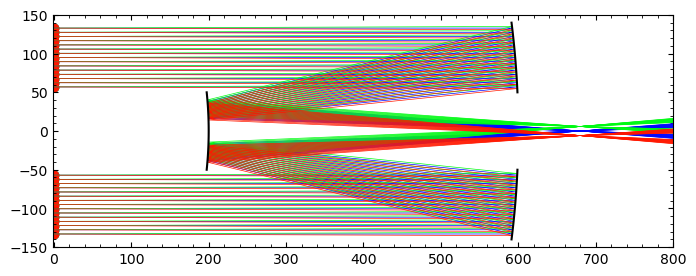

In [4]:
# Cassegrain telescope
scene = rt.Scene(xlim=(-1,800), ylim=(-150,150), lifetime=2000)
# scene = rt.Scene(xlim=(675,685), ylim=(-7,7), lifetime=2000)

F = 2800
b = 400
D = 400
primary_f = D*F/(F-b-D)
primary_aper = 280
secondary_f = primary_f - D
secondary_aper = 100

primary_top, primary_bot = rt.ParabolicMirrorHole(focal=primary_f, aperture=primary_aper, hole=secondary_aper, scene=scene, origin=[600,0], rotation=90)
secondary = rt.HyperbolicMirror(focal=secondary_f, aperture=secondary_aper, scene=scene, origin=[primary_top.origin[0]-D,0], rotation=90)

beam = rt.CollimatedBeam(aperture=0.95*primary_aper, scene=scene, origin=[0,0], rotation=0, N_sources=50, hole=1.1*secondary.aperture)
beam = rt.CollimatedBeam(wavelength=520, aperture=0.95*primary_aper, scene=scene, origin=[0,0], rotation=0.2, N_sources=50, hole=1.1*secondary.aperture)
beam = rt.CollimatedBeam(wavelength=620, aperture=0.95*primary_aper, scene=scene, origin=[0,0], rotation=-0.2, N_sources=50, hole=1.1*secondary.aperture)

scene.plot()

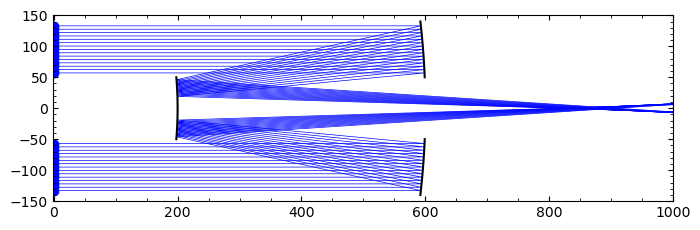

In [5]:
# Ritchey-Chretien telescope
scene = rt.Scene(xlim=(-1,1000), ylim=(-150,150), lifetime=2000)

primary_f = 400
primary_aper = 280
D = 400
secondary_f = 1.5*primary_f-D
secondary_aper = 100

primary_top, primary_bot = rt.HyperbolicMirrorHole(focal=primary_f, aperture=primary_aper, hole=secondary_aper, scene=scene, origin=[600,0], rotation=90)
secondary = rt.HyperbolicMirror(focal=secondary_f, aperture=secondary_aper, scene=scene, origin=[primary_top.origin[0]-D,0], rotation=90)

beam = rt.CollimatedBeam(aperture=0.95*primary_aper, scene=scene, origin=[0,0], rotation=0, N_sources=50, hole=1.1*secondary.aperture)

scene.plot()